In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.metrics.classification import accuracy_score
from sklearn.neighbors.classification import KNeighborsClassifier
from cmath import sqrt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier, LogisticRegression
import pygeohash as pgh
import matplotlib.pyplot as plt
import nltk
from sklearn.svm import SVR
from copy import deepcopy

import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction import text

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
from Data import *
from Feature_Engineering import *
from Data_Preprocessing import *
from models import *

In [18]:
data = Data('Data/train.csv', 'Data/test.csv')

In [19]:
data.data_import()

In [20]:
prepro = Data_Preprocessing()
prepro.X_Y_remove_outliers(data.train)

In [21]:
feat = Feature_Engineering()

In [22]:
def all_features(data, add_feature):
    feat.extract_dt_time(data)
    feat.add_seasons(data, add_feature)
    feat.add_crossing(data, add_feature)
    feat.X_Y_rot(data, add_feature)
    data = feat.onehot(data, ['DayOfWeek', 'Year', 'Hour', 'PdDistrict'], add_feature)
    return data

In [23]:
data.train = all_features(data.train, True)
data.test = all_features(data.test,  False)
data.train, data.test = feat.geohashing(data.train, data.test, precision = 6)
feat.add_feature(['Minute'])
data.train, data.test = feat.odds_base_target(data.train, data.test, 'Address', 'Category', 'ac', add_base_odds = True)
data.train, data.test = feat.odds_base_target(data.train, data.test, 'geohashes', 'Category', 'gc', add_base_odds = False)

In [24]:
new_data_train = feat.apply_PCA(data.train[feat.features], n_components = 80)
new_data_test = feat.apply_PCA(data.test[feat.features], n_components = 80)

In [25]:
new_data_train = pd.DataFrame(data = new_data_train)
new_data_test = pd.DataFrame(data = new_data_test)

In [26]:
new_data_test

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-20.084624,-4.141116,-1.081515,-0.443575,1.076291,-1.545821,0.445831,-1.785082,1.922191,0.227529,...,-0.150780,-0.138836,-0.179691,-0.021983,-0.003735,0.151868,-0.033622,0.856095,-0.346889,0.070471
1,22.869331,-2.406589,1.786097,0.154184,0.566336,-0.309998,2.323131,0.127634,-0.264841,-1.019929,...,0.140807,-0.082375,-0.147035,0.249257,-0.141672,0.533137,-0.696349,-0.161132,-0.105194,0.050137
2,5.894816,-3.077363,-0.793704,0.058303,-0.802108,-0.163114,-0.628812,0.014651,0.243537,-0.395083,...,-0.054600,-0.067330,-0.247791,0.317236,0.686755,-0.450790,-0.078966,-0.159476,-0.057975,-0.026341
3,9.866492,0.370869,-0.396711,0.974209,0.214694,0.813242,-1.111981,1.753192,0.514185,0.845137,...,-0.152312,0.168488,0.056680,0.161918,-0.029722,0.601430,-0.573181,-0.190431,-0.078958,-0.002128
4,24.851375,-1.032322,3.326854,-0.402295,-1.679970,-0.300278,-0.657575,1.038929,-0.192946,0.043900,...,0.186000,-0.018512,-0.116523,0.187696,-0.071456,0.053278,-0.034532,0.041218,0.105727,0.178597
5,-20.093768,-3.211837,-0.380792,-1.328104,-0.102357,1.484798,-0.892311,0.312305,0.440987,-0.165924,...,-0.053643,-0.029278,-0.108547,-0.097570,-0.035527,-0.011971,-0.024091,-0.019712,-0.016370,0.011254
6,-20.149008,0.523373,-0.063234,1.300388,-0.087939,0.120588,-0.578870,1.911214,-0.360002,-0.337586,...,-0.031181,0.106022,0.125911,-0.043637,-0.069430,-0.075156,0.024092,0.002279,0.012563,-0.052194
7,-20.181817,5.341987,3.065808,-0.647541,1.412288,-0.210221,-0.285240,-0.842307,0.785496,0.275440,...,0.544547,-0.195587,0.168223,-0.147713,-0.011317,-0.134323,0.048815,-0.074871,-0.002903,-0.066967
8,-20.147782,0.151480,-0.206860,1.795107,0.097198,-0.775547,-0.316101,1.583214,0.783614,0.690706,...,0.051253,0.380627,0.260467,-0.068620,-0.014017,-0.063783,0.071540,0.017070,-0.012958,-0.022360
9,-20.140592,-2.504303,2.472868,0.708523,-1.017672,0.504930,-0.346691,0.549918,-0.230023,-1.226224,...,-0.179459,-0.147394,-0.370274,0.220360,0.787738,-0.350599,-0.126457,-0.096938,-0.092919,-0.146503


In [27]:
prepro.form_labels(data.train, 'Category')

In [28]:
new_data_train = pd.concat([new_data_train, data.train.Category], axis = 1)

In [29]:
new_data_train

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,Category
0,19.888421,2.686374,-0.978541,-1.456223,1.695841,-0.232114,0.321127,-0.833157,-0.822678,-0.556379,...,0.140614,0.043693,0.056156,0.009737,-0.033064,-0.007819,-0.020453,0.081206,-0.052109,27
1,25.885741,-0.009694,0.464117,-3.974075,1.137156,2.367317,-0.582529,-1.088722,-0.404916,-0.584854,...,-0.042159,-0.031638,-0.014255,0.010517,0.078413,-0.071223,0.022119,0.156500,0.007885,17
2,-19.152434,-0.182899,0.934036,-2.579121,-0.916548,3.053262,1.792438,-0.879682,0.026677,-1.119663,...,-0.094755,-0.217177,-0.396197,0.088603,0.682450,-0.286779,-0.237234,-0.008080,0.063079,13
3,9.820591,-3.495575,1.571376,-0.925074,-1.051633,-0.285309,0.881153,-0.026309,0.257972,0.267793,...,0.062762,0.041723,0.099103,0.040928,0.047351,0.020627,-0.059858,-0.102510,0.006965,24
4,-18.136830,2.783122,-0.212606,0.143783,-0.629016,-0.530484,-0.476237,-0.697098,0.347420,-0.470999,...,0.122985,0.030617,0.027950,0.010370,-0.054831,0.013812,0.005809,-0.019956,-0.037176,21
5,-6.153475,1.889621,-0.824634,1.692361,0.002346,-1.776554,0.244379,-1.587957,0.607419,-0.090622,...,0.013029,-0.008651,0.103851,0.102956,0.042764,-0.016963,0.018530,-0.073254,-0.025696,34
6,24.846706,2.515864,-0.213059,1.307980,-1.851986,0.134849,-0.050670,-0.539585,0.044457,0.040979,...,0.040513,-0.101599,-0.109591,0.050909,-0.130247,0.223023,0.426215,-0.084302,0.721875,4
7,20.806491,-3.948631,1.283689,0.196107,-0.824635,-0.951695,-0.253983,-0.719774,0.129643,-0.446650,...,0.174778,0.017047,0.076830,0.087916,0.034364,0.010096,-0.006838,-0.015395,-0.102573,30
8,32.822441,-3.543368,1.460940,-0.690914,-0.761335,-0.441545,-0.127086,-0.589579,0.089283,0.661053,...,-0.044507,-0.121018,0.004483,0.137474,0.037881,0.223361,0.437168,-0.048889,0.754684,21
9,20.878195,2.707996,-0.929323,0.346913,0.463264,-1.842415,-1.913792,0.684500,1.573056,1.756227,...,-0.088963,-0.039447,-0.123231,-0.083793,-0.026649,-0.097200,0.021378,0.037207,0.077456,7


In [30]:
models = Model()
# x, y = models.data_split(new_data_pd, 0.8)
models.lr_clf(new_data_train, new_data_test, features = list(new_data_pd.columns),labels = 'Category', print_score = False)

max_iter reached after 572 seconds


/Users/glados/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  9.6min finished


KeyError: "['Category'] not in index"

In [32]:
print(models.predictions)

None


In [23]:
rc = data.train.groupby(['Resolution', 'Category'])

<Figure size 720x360 with 0 Axes>

Text(0.5,1,'ARSON')

Text(0.5,1,'ASSAULT')

Text(0.5,1,'BAD CHECKS')

Text(0.5,1,'BRIBERY')

Text(0.5,1,'BURGLARY')

Text(0.5,1,'DISORDERLY CONDUCT')

Text(0.5,1,'DRIVING UNDER THE INFLUENCE')

Text(0.5,1,'DRUG/NARCOTIC')

Text(0.5,1,'DRUNKENNESS')

Text(0.5,1,'EMBEZZLEMENT')

Text(0.5,1,'EXTORTION')

Text(0.5,1,'FAMILY OFFENSES')

Text(0.5,1,'FORGERY/COUNTERFEITING')

Text(0.5,1,'FRAUD')

Text(0.5,1,'GAMBLING')

Text(0.5,1,'KIDNAPPING')

Text(0.5,1,'LARCENY/THEFT')

Text(0.5,1,'LIQUOR LAWS')

Text(0.5,1,'LOITERING')

Text(0.5,1,'MISSING PERSON')

Text(0.5,1,'NON-CRIMINAL')

Text(0.5,1,'OTHER OFFENSES')

Text(0.5,1,'PROSTITUTION')

Text(0.5,1,'RECOVERED VEHICLE')

Text(0.5,1,'ROBBERY')

Text(0.5,1,'RUNAWAY')

Text(0.5,1,'SECONDARY CODES')

Text(0.5,1,'SEX OFFENSES FORCIBLE')

Text(0.5,1,'STOLEN PROPERTY')

Text(0.5,1,'SUICIDE')

Text(0.5,1,'SUSPICIOUS OCC')

Text(0.5,1,'TRESPASS')

Text(0.5,1,'VANDALISM')

Text(0.5,1,'VEHICLE THEFT')

Text(0.5,1,'WARRANTS')

Text(0.5,1,'WEAPON LAWS')

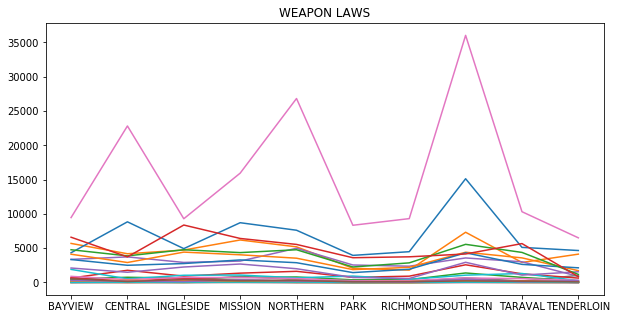

In [24]:
plt.figure(figsize=(10, 5));
for name, group in rc:
    if(name[0] == "NONE"):
#         print(name[1])
        
        plt.title(name[1]);
        plt.plot(group['PdDistrict'].value_counts().sort_index().index, group['PdDistrict'].value_counts().sort_index().values / );

In [32]:
rp = data.train.groupby(['PdDistrict', 'Resolution'])

In [33]:
rp.size()

PdDistrict  Resolution                            
BAYVIEW     ARREST, BOOKED                            19253
            ARREST, CITED                              9693
            CLEARED-CONTACT JUVENILE FOR MORE INFO       41
            COMPLAINANT REFUSES TO PROSECUTE            672
            DISTRICT ATTORNEY REFUSES TO PROSECUTE      648
            EXCEPTIONAL CLEARANCE                       125
            JUVENILE ADMONISHED                         175
            JUVENILE BOOKED                             848
            JUVENILE CITED                              346
            JUVENILE DIVERTED                            73
            LOCATED                                    3144
            NONE                                      51184
            NOT PROSECUTED                              275
            PROSECUTED BY OUTSIDE AGENCY                183
            PROSECUTED FOR LESSER OFFENSE                11
            PSYCHOPATHIC CASE                    

In [34]:
feat.features

['DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'Year_2003',
 'Year_2004',
 'Year_2005',
 'Year_2006',
 'Year_2007',
 'Year_2008',
 'Year_2009',
 'Year_2010',
 'Year_2011',
 'Year_2012',
 'Year_2013',
 'Year_2014',
 'Year_2015',
 'Hour_0',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN',
 'Summer',
 'Winter',
 'Autumn',
 'Spring',
 'ac_odds0',
 'ac_odds1',
 'ac_odds2',
 'ac_odds3',
 'ac_odds4',
 'ac_odds5',
 'ac_odds6',
 'ac_odds7',
 '